In [ ]:
import os
import cv2

dataset_path = "/Users/elyhahami/Downloads/Columbia Gaze Data Set"
file_list = sorted(os.listdir(dataset_path))
file_list.pop(0)
file_list

['0001',
 '0002',
 '0003',
 '0004',
 '0005',
 '0006',
 '0007',
 '0008',
 '0009',
 '0010',
 '0011',
 '0012',
 '0013',
 '0014',
 '0015',
 '0016',
 '0017',
 '0018',
 '0019',
 '0020',
 '0021',
 '0022',
 '0023',
 '0024',
 '0025',
 '0026',
 '0027',
 '0028',
 '0029',
 '0030',
 '0031',
 '0032',
 '0033',
 '0034',
 '0035',
 '0036',
 '0037',
 '0038',
 '0039',
 '0040',
 '0041',
 '0042',
 '0043',
 '0044',
 '0045',
 '0046',
 '0047',
 '0048',
 '0049',
 '0050',
 '0051',
 '0052',
 '0053',
 '0054',
 '0055',
 '0056']

In [ ]:
#can optimize this code by: 1) improve variable names; use numpy to deal with flattening arrays
##also need to get training labels
#can also do data augmentation
import numpy as np
import os
import cv2
my_list = []
dataset_path = "/Users/elyhahami/Downloads/Columbia Gaze Data Set"

# Get a list of subject folders in the dataset
file_list = sorted(os.listdir(dataset_path))
file_list.pop(0)
file_list
# Iterate over each subject folder
for subject_folder in file_list:
    subject_folder_path = os.path.join(dataset_path, subject_folder)

    # Get a list of photo files in the subject folder
    photo_files = sorted(os.listdir(subject_folder_path))
    my_list.append(photo_files)

# print(my_list)
vertical_labels_list = []
empty_list = []
bad_list = ['Thumbs.db','.picasa.ini', '.DS_Store']
for i in range(len(my_list)):
    photo_name_list = my_list[i]
    new_list = [item for item in photo_name_list if item not in bad_list]
    for j in new_list:
        head_position = j.split('_')[2][:-1]

        if head_position == "0":
            vertical_label = j.split('_')[3][:-1] # this gets vertical gaze labels (3 classes, 0, +-10)
            vertical_labels_list.append(vertical_label)

            empty_list.append(j) ##empty_list now only has head position of 0 degrees in it.
#finish something like this
# print(empty_list)

# one_dim_empty_list = [element for sublist in empty_list for element in sublist]
# print(len(one_dim_empty_list))
# # print(one_dim_empty_list)
# print(labels_list)
# print(len(labels_list))
models_train_labels = np.array([int(x) for x in vertical_labels_list])
print(len(models_train_labels))
print((models_train_labels))
# print((empty_list))
print(models_train_labels.shape)
print(len(empty_list))

1176
[-10 -10 -10 ...  10  10  10]
(1176,)
1176


In [ ]:
import cv2

def process_images(starting, ending):
    processed_images = []

    for index, image_path in enumerate(empty_list[starting:ending]):
        full_image_path = dataset_path + '/' + image_path
        lolol = full_image_path.split('/')
        number_path = lolol[5]
        important_num = number_path[0:4]

        newest_full_image_path = dataset_path + '/' + str(important_num) + '/' + image_path
        image = cv2.imread(newest_full_image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(1500, 1500))
#         print(len(faces))

        if len(faces) == 1:  # Require exactly one face for processing
#             print(f'{index} index is found')

            # Extract the coordinates of the face region
            x, y, w, h = faces[0]

            processed_images.append(image[y:y+h, x:x+w])


        else:
            print(f'{index} index is not found')

    return processed_images

In [ ]:
def concatenate_all_images():
    batch_size = 100  # Adjust batch size according to your requirements
    starting_index = 0
    all_images = []

    while starting_index < (len(empty_list)):
        processed_batch = process_images(starting_index, starting_index + batch_size)
        all_images.extend(processed_batch)
        starting_index += batch_size

    return all_images

In [ ]:
combined_list = concatenate_all_images()

57 index is not found
2 index is not found
4 index is not found
5 index is not found
6 index is not found
7 index is not found
8 index is not found
9 index is not found
10 index is not found
11 index is not found
12 index is not found
13 index is not found
14 index is not found
15 index is not found
16 index is not found
18 index is not found
19 index is not found
20 index is not found
21 index is not found
22 index is not found
23 index is not found
24 index is not found
98 index is not found
99 index is not found
0 index is not found
1 index is not found
2 index is not found
3 index is not found
4 index is not found
5 index is not found
6 index is not found
7 index is not found
8 index is not found
9 index is not found
10 index is not found
11 index is not found
12 index is not found
13 index is not found
14 index is not found
15 index is not found
16 index is not found
18 index is not found
40 index is not found
41 index is not found
42 index is not found
43 index is not found
45 in

In [ ]:
combined_list = [cv2.resize(image, (224,224)) for image in combined_list]

In [ ]:
len(combined_list)

1109

In [ ]:
##must normalize
# print('h')

In [ ]:
combined_list = [image[50:126, 30:201] for image in combined_list]

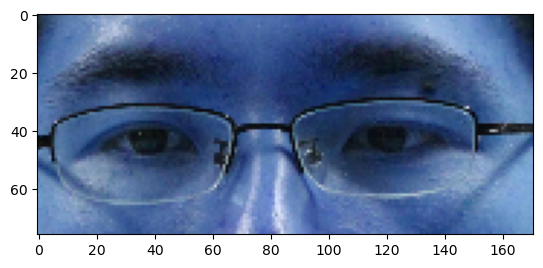

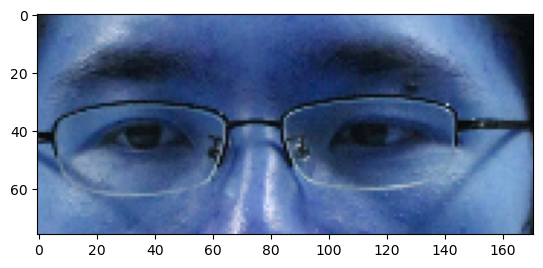

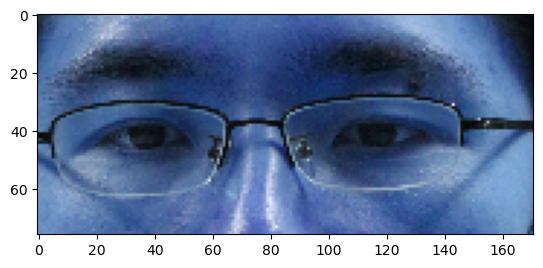

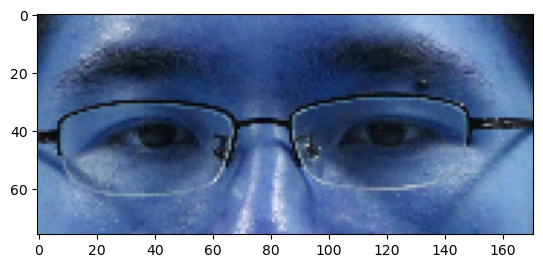

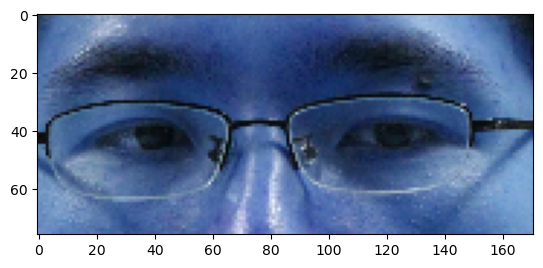

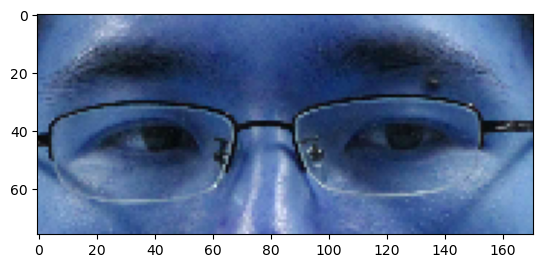

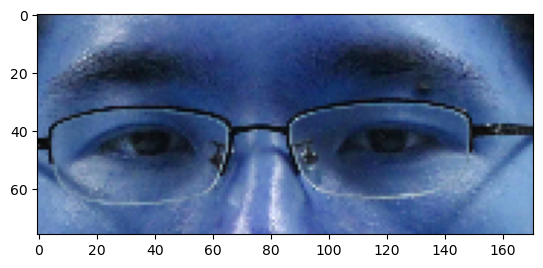

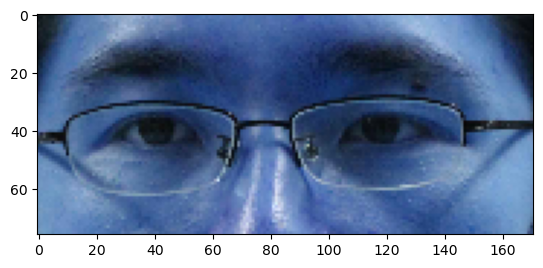

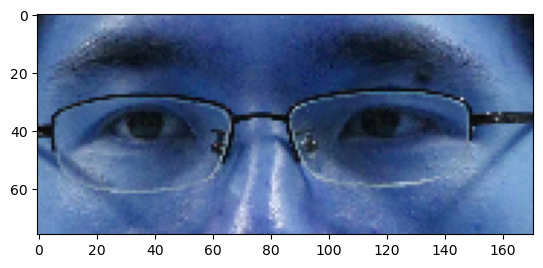

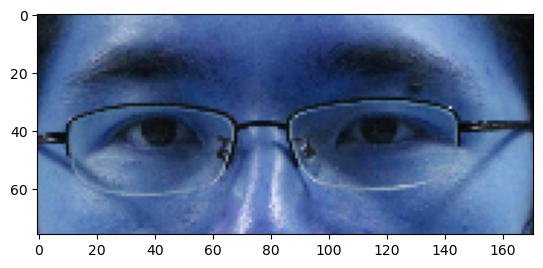

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(10):
    plt.imshow(combined_list[i])
    plt.show()

In [ ]:
combined_list = [image / 255.0 for image in combined_list] ##normalize

In [ ]:
total_train_images = np.array(combined_list)

In [ ]:
total_train_images[0]

array([[[0.11372549, 0.15686275, 0.21176471],
        [0.19215686, 0.23921569, 0.29803922],
        [0.1372549 , 0.20392157, 0.30980392],
        ...,
        [0.09411765, 0.12156863, 0.15686275],
        [0.07843137, 0.10588235, 0.14117647],
        [0.0627451 , 0.10196078, 0.11764706]],

       [[0.10980392, 0.17254902, 0.22352941],
        [0.16862745, 0.22745098, 0.28627451],
        [0.18431373, 0.2627451 , 0.36862745],
        ...,
        [0.06666667, 0.11764706, 0.14901961],
        [0.05490196, 0.10588235, 0.1372549 ],
        [0.04705882, 0.08235294, 0.09803922]],

       [[0.1372549 , 0.2       , 0.25098039],
        [0.16470588, 0.22745098, 0.28235294],
        [0.14509804, 0.22352941, 0.32941176],
        ...,
        [0.0745098 , 0.1254902 , 0.15686275],
        [0.06666667, 0.11764706, 0.14901961],
        [0.06666667, 0.10196078, 0.11764706]],

       ...,

       [[0.43529412, 0.56862745, 0.77647059],
        [0.41176471, 0.54117647, 0.75294118],
        [0.40392157, 0

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
#     rotation_range=20,        # Random rotation within the range of -20 to +20 degrees
    width_shift_range=0.1,    # Random horizontal shift within the range of -20% to +20% of the image width
    height_shift_range=0.1,   # Random vertical shift within the range of -20% to +20% of the image height
#     shear_range=0.2,          # Random shearing transformations
    zoom_range=0.1,           # Random zooming in/out of the image
#     horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill any newly created pixels during transformations with the nearest pixel value
)

# Reshape total_train_images to (num_images, height, width, num_channels)
total_train_images = np.reshape(total_train_images, (total_train_images.shape[0], total_train_images.shape[1], total_train_images.shape[2], total_train_images.shape[3]))

# Perform data augmentation on total_train_images
augmented_images = []
for image in total_train_images:
    augmented_images.extend(datagen.flow(np.expand_dims(image, axis=0), batch_size=1)[0])

# Convert augmented_images list to NumPy array
augmented_images = np.array(augmented_images)

# Reshape augmented_images to original shape
augmented_images = augmented_images.reshape((-1,) + total_train_images.shape[1:])

# Concatenate augmented_images with original total_train_images
total_train_images_plus_augmented = np.concatenate((total_train_images, augmented_images), axis=0)

/Users/elyhahami/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
total_train_images_plus_augmented.shape

(2218, 76, 171, 3)

In [ ]:
##deleting 'image not found' indexes from labels to match up with total_train_images:
indexes_to_delete_list = [157, 502,504,505,506,507,508,509,510,511,512,513,514,515,516,518,519,520,521,522,523,524,
           798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,
           814,815,816,818,840,841,842,843,845,847,848,849,850,851,852,853,854,855,859,860,
           870,882,883,884,889,895,899,901,902]

In [ ]:
len(indexes_to_delete_list)

67

In [ ]:
models_train_labels = np.delete(models_train_labels, indexes_to_delete_list)

In [ ]:
models_train_labels.shape

(1109,)

In [ ]:
import numpy as np
# Assuming models_train_labels contains the labels for the non-augmented data (1176 labels)

# Create additional labels for the augmented data
augmented_labels = np.tile(models_train_labels, (augmented_images.shape[0] // len(models_train_labels)))

# Concatenate the original labels with the augmented labels
total_labels = np.concatenate((models_train_labels, augmented_labels), axis=0)

In [ ]:
total_labels.shape

(2218,)

In [ ]:
##one-hot encoding
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(total_labels)
one_hot_labels = to_categorical(integer_labels, num_classes=3)

In [ ]:
one_hot_labels.shape

(2218, 3)

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

# Set the number of classes
num_classes = 3

# Set the input shape for the model
input_shape = (76, 171, 3)  # Adjust based on your image dimensions

# Load pre-trained VGG16 model without the top (fully connected) layers
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Add your own classification layers on top of the VGG16 model
x = base_model_vgg16.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Add a Dropout layer with a dropout rate of 0.5

predictions = Dense(num_classes, activation='softmax')(x)

# Create the VGG16-based model
model = Model(inputs=base_model_vgg16.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model_vgg16.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 76, 171, 3)]      0         
                                                                 
 block1_conv1 (Conv2D)       (None, 76, 171, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 76, 171, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 38, 85, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 38, 85, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 38, 85, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 19, 42, 128)       0     

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [ ]:
# Train the model:
history = model.fit(x=total_train_images_plus_augmented, y=one_hot_labels,
          validation_split=0.2, batch_size = 64, epochs = 50, shuffle = True, verbose = 1,callbacks=[reduce_lr]) # callbacks=[stop_early]

Epoch 1/50
28/28 [==============================] - 55s 2s/step - loss: 1.1816 - accuracy: 0.5130 - val_loss: 1.2517 - val_accuracy: 0.3243 - lr: 0.0010
Epoch 2/50
28/28 [==============================] - 55s 2s/step - loss: 0.8866 - accuracy: 0.6077 - val_loss: 1.2493 - val_accuracy: 0.4077 - lr: 0.0010
Epoch 3/50
28/28 [==============================] - 55s 2s/step - loss: 0.7603 - accuracy: 0.6646 - val_loss: 1.2015 - val_accuracy: 0.4595 - lr: 0.0010
Epoch 4/50
28/28 [==============================] - 55s 2s/step - loss: 0.6946 - accuracy: 0.7007 - val_loss: 1.2128 - val_accuracy: 0.4887 - lr: 0.0010
Epoch 5/50
28/28 [==============================] - 55s 2s/step - loss: 0.6531 - accuracy: 0.7029 - val_loss: 1.2588 - val_accuracy: 0.3671 - lr: 0.0010
Epoch 6/50
28/28 [==============================] - 54s 2s/step - loss: 0.5941 - accuracy: 0.7424 - val_loss: 1.1769 - val_accuracy: 0.4077 - lr: 0.0010
Epoch 7/50
28/28 [==============================] - 55s 2s/step - loss: 0.5571 - a

In [ ]:
model.save('most_updated_vertical_position_prediction.h5')